# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)
u, s, vh

(array([[-0.48835631, -0.87264432],
        [-0.87264432,  0.48835631]]),
 array([1.02285697, 0.11731846]),
 array([[-0.38900195, -0.92123693],
        [ 0.92123693, -0.38900195]]))

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    suma=0
    if isinstance(A ,np.ndarray)==False:
        print("No es un Numpy Array")
    else:
        u, s, vh= svd(A)
        m, n=A.shape
        for i in range(min(m,n)):
            suma+=(s[i]*u[:,i:i+1]*vh[i:i+1,:])
    return np.allclose(A, suma)


In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

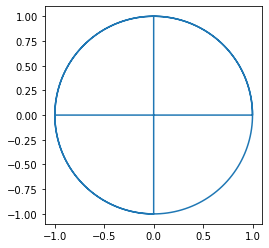

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


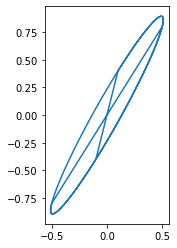

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)

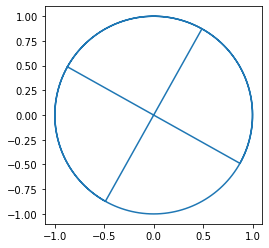

In [11]:
show_circle(u@circle)

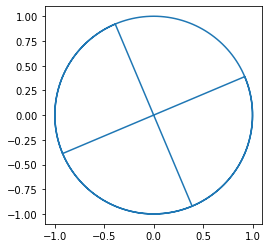

In [19]:
show_circle(vh@circle)

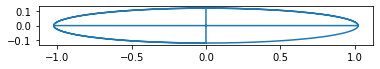

In [22]:
show_circle(np.diag(s)@circle)

__Respuesta:__ Se ve cómo se rota la circunferencia en un sentido en cada instancia para los primeros dos casos, y cómo se estrecha en el último (considerando la variable no unitaria).

__Respuesta:__ El que sean de tipo unitarios, que hace que se afecte solo una dimensión de la circunferencia, solo rotando el plano, mientras que el usar una matriz no unitaria, se estrecha la circunferencia.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [12]:
from pathlib import Path
from PIL import Image

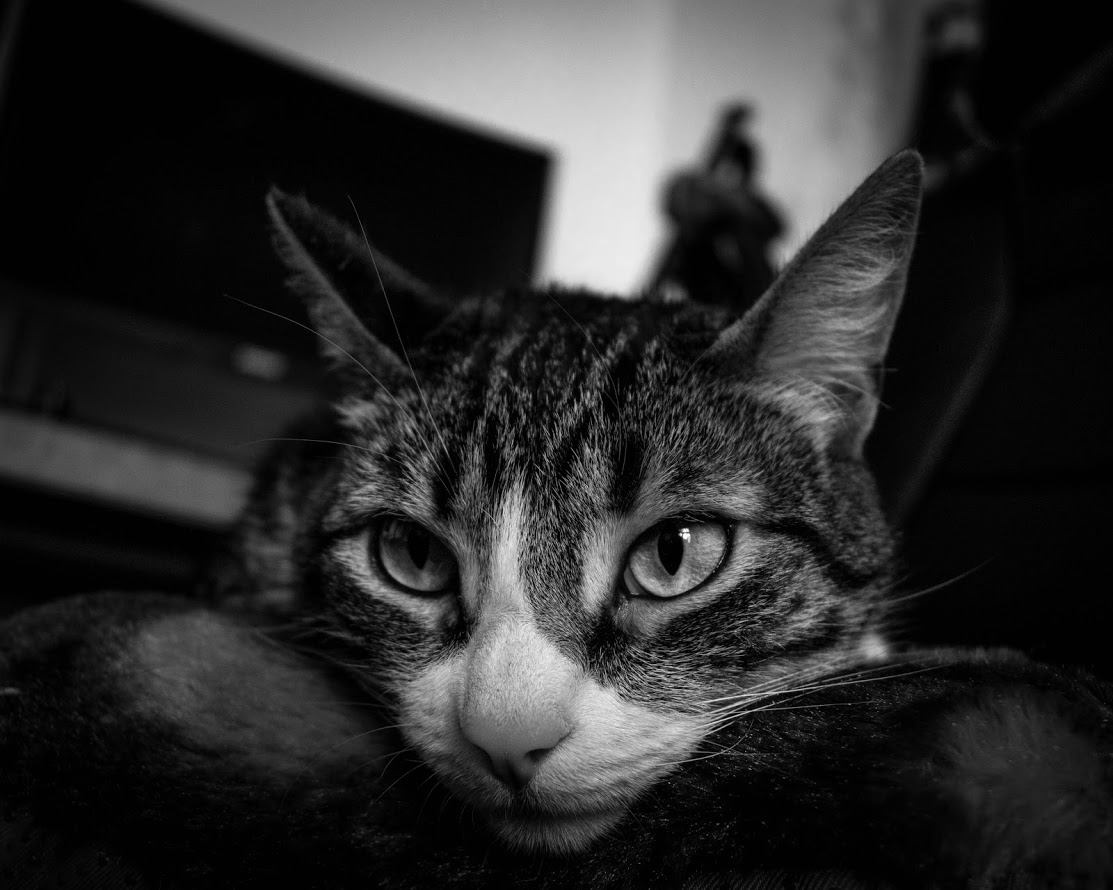

In [13]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [14]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [15]:
def low_rank_svd_approximation(A, l):
    if isinstance(A ,np.ndarray)==False or A.ndim!=2 or isinstance(l ,int)==False:
        print("El input no es compatible")
    else:
        suma=0
        u, s, vh= svd(A)
        for i in range(l):
            suma+=(s[i]*u[:,i:i+1]*vh[i:i+1,:])
        print(np.linalg.norm(A-suma,'fro'))            
    return suma
    


16040.937


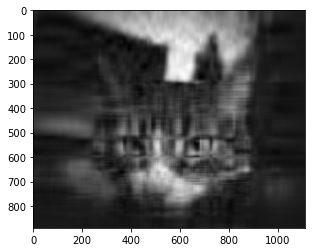

In [16]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

8141.8804


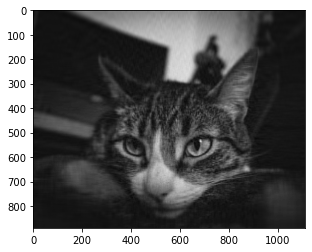

In [17]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [18]:
def low_rank_svd_tol_approximation(A, tol):
    if isinstance(A ,np.ndarray)==False or A.ndim!=2 :
        print("El input no es compatible")
    else:
        m,n=A.shape
        z=min(m,n)
        u, s, vh= svd(A)
        for i in range(1,z+1):
            e=(s[i+1:z+1]**2).sum()/(s[0:z+1]**2).sum()
            if e<=tol:
                l=i
                print("El mayor rango aproximado de A tal que el error de aproximación sea a lo más e, es " +str(l))
                break
        #Ahora se retorna la app. de A
        Al_e=0
        for i in range(l):
                Al_e+=(s[i]*u[:,i:i+1]*vh[i:i+1,:])
        return Al_e
        

El mayor rango aproximado de A tal que el error de aproximación sea a lo más e, es 4


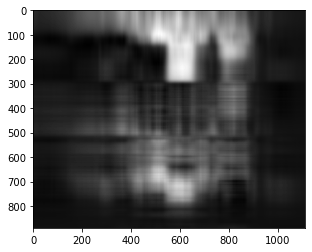

In [19]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El mayor rango aproximado de A tal que el error de aproximación sea a lo más e, es 63


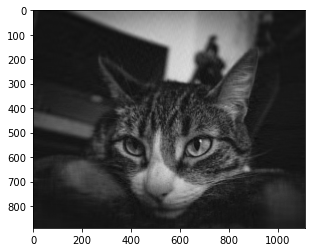

In [20]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

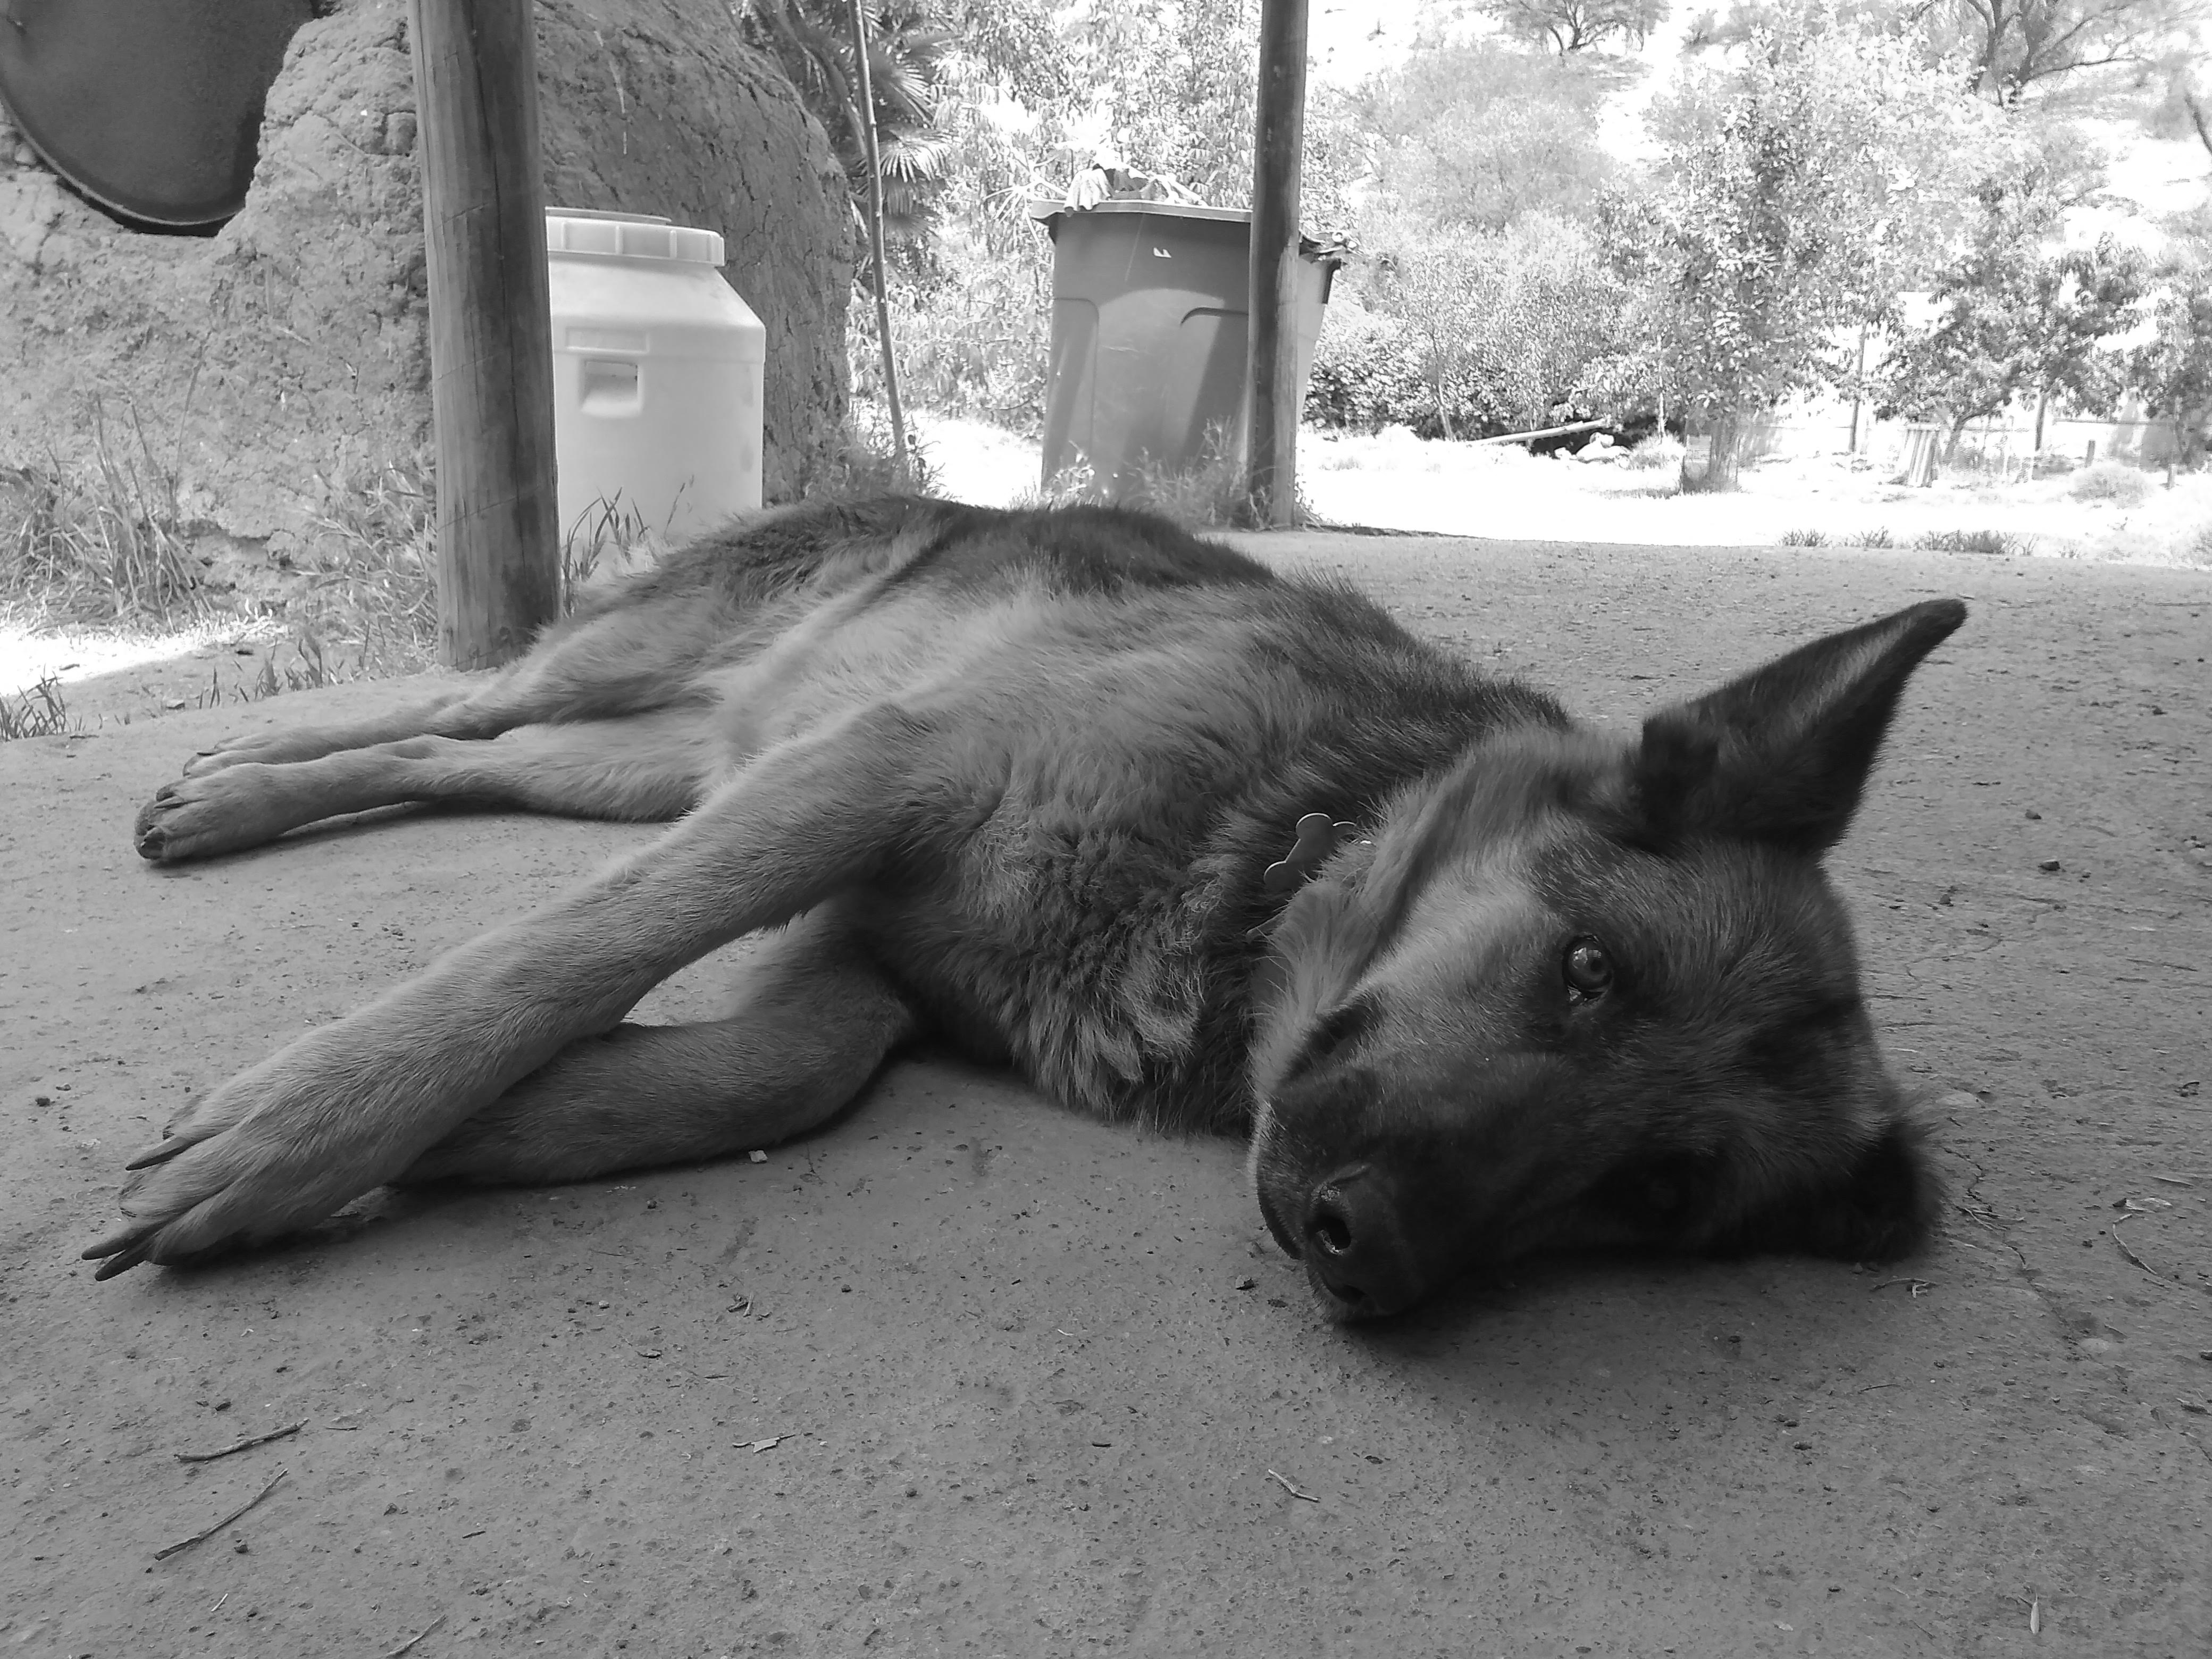

In [21]:
your_img = Image.open(Path().resolve().parent / "homeworks"/ "kooza.jpg" ).convert('L')
your_img

In [284]:
your_img_np = np.array(your_img)
your_img_np

array([[111, 109, 109, ..., 254, 253, 253],
       [113, 110, 109, ..., 253, 253, 254],
       [112, 109, 108, ..., 249, 250, 253],
       ...,
       [144, 144, 144, ..., 111, 113, 114],
       [142, 142, 142, ..., 112, 112, 111],
       [138, 138, 139, ..., 110, 111, 111]], dtype=uint8)

73605.37


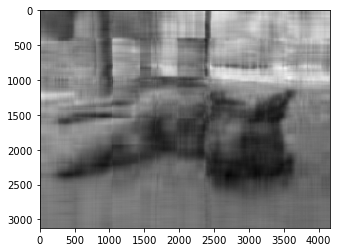

In [285]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

63306.11


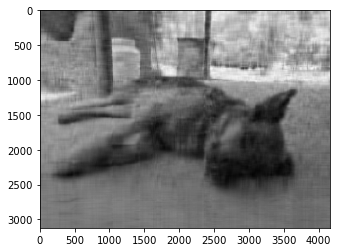

In [34]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El mayor rango aproximado de A tal que el error de aproximación sea a lo más e, es 1


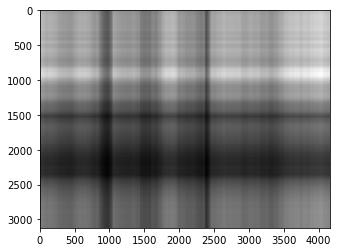

In [286]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

In [ ]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__Se pierde bastante calidad en las imágenes, a no ser que exista una tolerancia muy pequeña (bajo 1e-2) para mantener una aproximación decente.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [22]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [26]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

region  codigo_region                          comuna  \
0  Arica y Parinacota             15                           Arica   
1  Arica y Parinacota             15                       Camarones   
2  Arica y Parinacota             15                   General Lagos   
3  Arica y Parinacota             15                           Putre   
4  Arica y Parinacota             15  Desconocido Arica y Parinacota   

   codigo_comuna  poblacion  2020-03-30  2020-04-01  2020-04-03  2020-04-06  \
0        15101.0   247552.0         6.0         6.0        12.0        41.0   
1        15102.0     1233.0         0.0         0.0         0.0         0.0   
2        15202.0      810.0         0.0         0.0         0.0         0.0   
3        15201.0     2515.0         0.0         0.0         0.0         0.0   
4            NaN        NaN         NaN         NaN         NaN         NaN   

   2020-04-08  ...  2020-10-02  2020-10-05  2020-10-09  2020-10-12  \
0        63.0  ...      8597.0      8772.0      8996.0      9138.0   
1         0.0  ...        27.0        28.0        28.0        28.0   
2         0.0  ...        64.0        64.0        64.0        64.0   
3         0.0  ...        67.0        70.0        70.0        70.0   
4         NaN  ...        37.0        36.0        36.0        40.0   

   2020-10-16  2020-10-19  2020-10-24  2020-10-26  2020-10-30    tasa  
0      9343.0      9472.0      9679.0      9763.0      9888.0  3994.3  
1        28.0        28.0        28.0        28.0        28.0  2270.9  
2        64.0        64.0        64.0        64.0        64.0  7901.2  
3        70.0        70.0        71.0        72.0        72.0  2862.8  
4        43.0        43.0        43.0        44.0        36.0     NaN  

[5 rows x 70 columns]

In [27]:
start_date = pd.to_datetime("2020-10-1", format='%Y-%m-%d')
end_date = pd.to_datetime("2020-10-11", format='%Y-%m-%d')

def diferencia(x):
    casos_tot = []
    for i in range(0, len(x)):
        if i==0:
            casos_tot.append(x[i])
        else:
            if x[i]-x[i-1]>0:
                casos_tot.append(x[i]-x[i-1]) 
            else: 
                casos_tot.append(0)
    return casos_tot  

In [28]:
covid_tasa_promedio_nuevos = (covid_comunas.melt(id_vars=['region','codigo_region','comuna','codigo_comuna','poblacion','tasa']
    , var_name='fecha',value_name='casos_totales'))
covid_tasa_promedio_nuevos['fecha']=pd.to_datetime(covid_tasa_promedio_nuevos.loc[:,'fecha'], format='%Y-%m-%d')

covid_tasa_promedio_nuevos= (covid_tasa_promedio_nuevos.loc[lambda x: (start_date <= x['fecha']) & (x['fecha'] <= end_date)]
    .sort_values('fecha').loc[lambda x: x['codigo_comuna'].notnull()].fillna(0))

casos_nuevos1 = diferencia(covid_tasa_promedio_nuevos['casos_totales'].values) 

covid_tasa_promedio_nuevos['casos_nuevos'] = casos_nuevos1

covid_tasa_promedio_nuevos=((covid_tasa_promedio_nuevos.groupby(['region','comuna'])
    .agg(promedio_casos_nuevos=("casos_nuevos", "mean"))).merge(covid_comunas.loc[:,["region","poblacion","comuna"]], how='inner', on="comuna") #se vuelve a agregar población
    .assign(tasa_promedio_casos_nuevos=lambda df: 100000*df['promedio_casos_nuevos']/df["poblacion"]) #se crea tasa_promedio_casos_nuevos
    .reindex(columns=["region",'comuna','poblacion','promedio_casos_nuevos','tasa_promedio_casos_nuevos'])
    .sort_values(by='tasa_promedio_casos_nuevos', ascending=False))

#covid_tasa_promedio_nuevos[covid_tasa_promedio_nuevos.loc[:,"comuna"]=="Valparaiso"]
#covid_tasa_promedio_nuevos[covid_tasa_promedio_nuevos.loc[:,"comuna"]=="San Gregorio"]
covid_tasa_promedio_nuevos

region         comuna  poblacion  promedio_casos_nuevos  \
160     Magallanes   Punta Arenas   141984.0            8753.666667   
212  Metropolitana     La Pintana   189335.0            8913.333333   
158     Magallanes       Porvenir     7323.0             312.333333   
201  Metropolitana       Conchali   139195.0            5751.666667   
207  Metropolitana  Independencia   142065.0            5740.333333   
..             ...            ...        ...                    ...   
89          Biobío    San Rosendo     3611.0               0.000000   
227  Metropolitana       Penaflor   101058.0               0.000000   
87          Biobío       Quilleco    10032.0               0.000000   
229  Metropolitana         Pirque    30433.0               0.000000   
173          Maule       Licanten     6989.0               0.000000   

     tasa_promedio_casos_nuevos  
160                 6165.248667  
212                 4707.705038  
158                 4265.100824  
201                 4132.092867  
207                 4040.638675  
..                          ...  
89                     0.000000  
227                    0.000000  
87                     0.000000  
229                    0.000000  
173                    0.000000  

[346 rows x 5 columns]

In [29]:
covid_tasa_promedio_nuevos

region         comuna  poblacion  promedio_casos_nuevos  \
160     Magallanes   Punta Arenas   141984.0            8753.666667   
212  Metropolitana     La Pintana   189335.0            8913.333333   
158     Magallanes       Porvenir     7323.0             312.333333   
201  Metropolitana       Conchali   139195.0            5751.666667   
207  Metropolitana  Independencia   142065.0            5740.333333   
..             ...            ...        ...                    ...   
89          Biobío    San Rosendo     3611.0               0.000000   
227  Metropolitana       Penaflor   101058.0               0.000000   
87          Biobío       Quilleco    10032.0               0.000000   
229  Metropolitana         Pirque    30433.0               0.000000   
173          Maule       Licanten     6989.0               0.000000   

     tasa_promedio_casos_nuevos  
160                 6165.248667  
212                 4707.705038  
158                 4265.100824  
201                 4132.092867  
207                 4040.638675  
..                          ...  
89                     0.000000  
227                    0.000000  
87                     0.000000  
229                    0.000000  
173                    0.000000  

[346 rows x 5 columns]

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Se ven comunas periféricas de Santiago con poblaciones de distintos órdenes de magnitud. 

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [23]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

region  codigo_region  poblacion  2020-04-09  2020-04-10  \
0  Arica y Parinacota             15     252110        70.0         NaN   
1            Tarapacá              1     382773         NaN         NaN   
2         Antofagasta              2     691854       182.0       128.0   
3             Atacama              3     314709        57.0        52.0   
4            Coquimbo              4     836096         NaN         NaN   

   2020-04-11  2020-04-12  2020-04-13  2020-04-14  2020-04-15  ...  \
0        93.0       103.0         NaN        93.0        24.0  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2       107.0       175.0       103.0        95.0       117.0  ...   
3        60.0        25.0        20.0        22.0        25.0  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   2020-10-23  2020-10-24  2020-10-25  2020-10-26  2020-10-27  2020-10-28  \
0         794         738         737         832         542         343   
1         972         932        1046        1044         796         714   
2        1571        1890        2239        3825        1749        1354   
3         792         838        1020         939         563         340   
4        1008        1128        1057        1026         473        1503   

   2020-10-29  2020-10-30  2020-10-31  2020-11-01  
0         706         777        1058        1025  
1         694         946        1752         906  
2        1858        1238        1906        2549  
3         237         838         863         781  
4        1050        1125        1351        1245  

[5 rows x 210 columns]

Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [24]:
covid_pcr_melt = covid_pcr.melt(id_vars=["region","codigo_region","poblacion"], var_name='fecha',value_name='nm_pcr')
covid_pcr_melt['fecha']=pd.to_datetime(covid_pcr_melt['fecha'], format="%Y-%m-%d")
covid_pcr_melt=covid_pcr_melt.drop(columns=["codigo_region","poblacion"]).fillna(0)

covid_pcr_melt.head()

region      fecha  nm_pcr
0  Arica y Parinacota 2020-04-09    70.0
1            Tarapacá 2020-04-09     0.0
2         Antofagasta 2020-04-09   182.0
3             Atacama 2020-04-09    57.0
4            Coquimbo 2020-04-09     0.0

Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [30]:
covid_casos_melt = (covid_comunas.melt(id_vars=['region','codigo_region','comuna','codigo_comuna','poblacion','tasa']
    , var_name='fecha',value_name='casos_totales').drop(columns=["codigo_region","codigo_comuna","comuna","tasa","poblacion"]).fillna(0))
covid_casos_melt["fecha"]=pd.to_datetime(covid_casos_melt['fecha'], format="%Y-%m-%d")
covid_casos_melt= covid_casos_melt.groupby(["region","fecha"]).agg(casos_totales=("casos_totales", "sum"))
covid_casos_melt

casos_totales
region      fecha                    
Antofagasta 2020-03-30           29.0
            2020-04-01           32.0
            2020-04-03           49.0
            2020-04-06           65.0
            2020-04-08           72.0
...                               ...
Ñuble       2020-10-16         9129.0
            2020-10-19         9270.0
            2020-10-24         9534.0
            2020-10-26         9634.0
            2020-10-30         9815.0

[1024 rows x 1 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [31]:
covid_corr_casos_pcr = (pd.merge(covid_pcr_melt,covid_casos_melt, on=["region","fecha"], how="outer").fillna(0)
    # FIX ME PLEASE #.casos_totales.ffill()
)
covid_corr_casos_pcr["casos_totales"].ffill(axis=0)

covid_corr_casos_pcr=(covid_corr_casos_pcr.groupby("region")[["nm_pcr","casos_totales"]].apply(lambda df: df.corr())#Se elimina la información sobrante
   .loc[(slice(None),"nm_pcr"),"casos_totales"]
    .reset_index(level=1, drop=True)
    .sort_values())

covid_corr_casos_pcr

region
Antofagasta           0.283722
Los Lagos             0.324397
Metropolitana         0.325000
Araucanía             0.333724
Tarapacá              0.360963
Aysén                 0.361063
Valparaíso            0.367980
Magallanes            0.387628
Ñuble                 0.396698
Los Ríos              0.399651
O’Higgins             0.400194
Maule                 0.405878
Coquimbo              0.406176
Atacama               0.412564
Biobío                0.426168
Arica y Parinacota    0.428292
Name: casos_totales, dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__Que efectivamente hay una correlación entre los exámenes y los infectados, aunque sea baja. Por esto, se puede esperar que hayan más contagiados de los reportados, suponiendo que no se han testeado.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Cuál es la relación entre rango etario que llega a estado crítico y el que no llega a la hospitalización?

In [254]:
covid_hosp_etario = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto22/HospitalizadosEtario_Acumulado.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
).copy()
covid_hosp_etario.head(), covid_hosp_etario["grupo_de_edad"].unique()

#grupos de edad de ambos df originales:
# covid_hosp_etario
# [5 rows x 88 columns],
#  array(['00  15 años', '15  29 años', '30  44 años', '45  59 años',
#         '60  79 años', '80 y más años', '00  5 años', '5  17 años',
#         '18  49 años', '50  59 años', '60  69 años', '70  79 años'],
#        dtype=object))
# covid_etario
# [5 rows x 90 columns],
#  array(['00 - 04 años', '05 - 09 años', '10 - 14 años', '15 - 19 años',
#         '20 - 24 años', '25 - 29 años', '30 - 34 años', '35 - 39 años',
#         '40 - 44 años', '45 - 49 años', '50 - 54 años', '55 - 59 años',
#         '60 - 64 años', '65 - 69 años', '70 - 74 años', '75 - 79 años',
#         '80 y más años'], dtype=object))

(  grupo_de_edad sexo  2020-03-24  2020-03-25  2020-03-26  2020-03-27  \
 0   00  15 años    M         1.0         1.0         1.0         1.0   
 1   15  29 años    M         2.0         6.0         8.0         8.0   
 2   30  44 años    M         9.0        26.0        28.0        34.0   
 3   45  59 años    M         8.0        17.0        20.0        23.0   
 4   60  79 años    M        11.0        22.0        25.0        28.0   
 
    2020-03-28  2020-03-29  2020-03-30  2020-03-31  ...  2020-09-28  \
 0         1.0         1.0         1.0         1.0  ...         NaN   
 1         9.0         9.0        11.0        12.0  ...         NaN   
 2        42.0        43.0        46.0        49.0  ...         NaN   
 3        32.0        35.0        39.0        48.0  ...         NaN   
 4        32.0        35.0        36.0        43.0  ...         NaN   
 
    2020-10-02  2020-10-05  2020-10-09  2020-10-12  2020-10-16  2020-10-19  \
 0         NaN         NaN         NaN         NaN    

In [255]:
covid_etario_total = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_")).copy()
)

covid_etario_total.head(), covid_etario_total["grupo_de_edad"].unique()

(  grupo_de_edad sexo  2020-03-25  2020-03-26  2020-03-27  2020-03-28  \
 0  00 - 04 años    M           4           5           5           5   
 1  05 - 09 años    M           2           2           2           4   
 2  10 - 14 años    M           7           8           8          10   
 3  15 - 19 años    M           8           9          13          16   
 4  20 - 24 años    M          25          32          35          46   
 
    2020-03-29  2020-03-30  2020-03-31  2020-04-01  ...  2020-09-28  \
 0           5           5           6           7  ...        5403   
 1           4           4           4           7  ...        4644   
 2          10          10          10          12  ...        5298   
 3          17          18          22          26  ...        8535   
 4          52          58          64          72  ...       20310   
 
    2020-10-02  2020-10-05  2020-10-09  2020-10-12  2020-10-16  2020-10-19  \
 0        5552        5552        5733        5823    

In [256]:
covid_hosp_etario=covid_hosp_etario.melt(id_vars=["grupo_de_edad","sexo"], var_name="fecha", value_name="hospitalizados")

replace_map={'00  5 años':'00 15 años','50  59 años':'45  59 años', '00  15 años':'00  15 años', '15  29 años':'15  29 años', '30  44 años':'30  44 años'
             , '45  59 años':'45  59 años', '80 y más años':'80 y más años', '00  5 años':'00  5 años'
             , '50  59 años':'50  59 años', '60  69 años':'60  69 años', '70  79 años':'70  79 años'}

covid_hosp_etario["fecha"]=pd.to_datetime(covid_hosp_etario['fecha'], format="%Y-%m-%d")

covid_hosp_etario["grupo_de_edad"]=covid_hosp_etario["grupo_de_edad"].map(replace_map, na_action = 'ignore')
to_delete=covid_hosp_etario[covid_hosp_etario["grupo_de_edad"].isin(['60  79 años','5  17 años','18  49 años'])].index.tolist()
covid_hosp_etario=covid_hosp_etario.drop(to_delete)
covid_hosp_etario.head()

grupo_de_edad sexo      fecha  hospitalizados
0   00  15 años    M 2020-03-24             1.0
1   15  29 años    M 2020-03-24             2.0
2   30  44 años    M 2020-03-24             9.0
3   45  59 años    M 2020-03-24             8.0
4           NaN    M 2020-03-24            11.0

In [257]:
covid_etario_total=covid_etario_total.melt(id_vars=["grupo_de_edad","sexo"], var_name="fecha", value_name="enfermos_")

replace_map={"00 - 04 años": "00 15 años", "05 - 09 años": "00 15 años", "10 - 14 años": "00 15 años", "15 - 19 años": "15  29 años"
      ,'20 - 24 años': "15  29 años", '25 - 29 años': "15  29 años", '30 - 34 años':'30  44 años', '35 - 39 años':'30  44 años'  #adaptando las categorías para corresponderse con el otro df
    ,'40 - 44 años':'30  44 años', '45 - 49 años':'45  59 años', '50 - 54 años':'45  59 años', '55 - 59 años':'45  59 años'
    ,'60 - 64 años':'60  69 años', '65 - 69 años':'60  69 años', '70 - 74 años': '70  79 años', '75 - 79 años':'70  79 años', "80 y más años":"80 y más años"}

covid_etario_total["fecha"]=pd.to_datetime(covid_etario_total["fecha"], format="%Y-%m-%d")

covid_etario_total["grupo_de_edad"]=covid_etario_total["grupo_de_edad"].map(replace_map, na_action = 'ignore').dropna()
covid_etario_total[covid_etario_total["grupo_de_edad"]=="80 y más años"]

# covid_etario_total["grupo_de_edad"].unique()

grupo_de_edad sexo      fecha  enfermos_
16    80 y más años    M 2020-03-25          6
33    80 y más años    F 2020-03-25          2
50    80 y más años    M 2020-03-26          9
67    80 y más años    F 2020-03-26          2
84    80 y más años    M 2020-03-27          9
...             ...  ...        ...        ...
2923  80 y más años    F 2020-10-24       9581
2940  80 y más años    M 2020-10-26       6188
2957  80 y más años    F 2020-10-26       9628
2974  80 y más años    M 2020-10-30       6251
2991  80 y más años    F 2020-10-30       9702

[176 rows x 4 columns]

In [258]:

covid_hosp_etario["grupo_de_edad"].unique(), covid_etario_total["grupo_de_edad"].unique()   



(array(['00  15 años', '15  29 años', '30  44 años', '45  59 años', nan,
        '80 y más años', '00  5 años', '50  59 años', '60  69 años',
        '70  79 años'], dtype=object),
 array(['00 15 años', '15  29 años', '30  44 años', '45  59 años',
        '60  69 años', '70  79 años', '80 y más años'], dtype=object))

In [263]:
covid_comparado=(covid_etario_total.merge(covid_hosp_etario, how="inner", on="grupo_de_edad").groupby(["grupo_de_edad"]).agg(Promedio_hosp=("hospitalizados","mean")
            ,casos_totales=("enfermos_","mean")))

covid_comparado

Promedio_hosp  casos_totales
grupo_de_edad                              
15  29 años        39.214286    7852.246212
30  44 años        89.089286    9970.751894
45  59 años       108.178571    7767.272727
60  69 años      2654.534483    4380.071023
70  79 años      2139.974138    2181.170455
80 y más años    1017.232558    2734.090909

__Respuesta:__ Se ve que hay más casos en general para el rango etario más joven (menor a 59 años), pero muchas más hospitalizaciones en la población sobre ese rango etario.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [ ]:
# FIX ME PLEASE #

__Respuesta:__